# The Science of Decisions (Perceptual Analysis)


##### By Raul Maldonado

**Background Information:**

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. 

In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red"> **RED**</span>, <span style="color:blue"> ** BLUE** </span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green"> PURPLE </span>, <span style="color:purple">ORANGE</span>. 

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

You can see this example displayed in the visual below:

######  ![alt text](http://mercercognitivepsychology.pbworks.com/f/1384790362/stroopsample.jpg)

**Project Goal:**
We will investigate for the classical phenomenon called Stroop Effect.



____

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = pd.read_csv("stroopdata.csv")

In [3]:
file.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### Preliminary Thoughts

### Question 1: What is our independent variable? What is our dependent Variable?

_An independent variable is defined as a factor in an experiement whose variation does not depend on that of another_. 

So, our independent variable is a  word being congruent or incongruent. 

-----

_A dependent variable is defined as a factor who depends on the variation of another variable_. 

In our case, our dependent variable is measuring the reaction time it takes to classify incongruent and congruent words

### Question 2: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?

We ask ourselves if there is a significant difference in reaction time of the word conditions? 

Each participant was required to take a test and react from the word condition. Because there are two conditions that are observed in one trial per participant, we observe that this study is dependent paired study. 

These sets of data produced the different scores that are linked in the population through repeated measurement.

Moreover, this sample data set has $n<30$ participants with an unknown population standard deviation $\sigma$. 

Lastly, we can assume we are randomly drawing data from a normally distributed population. 

This assumption for normality can be a solidifying key factor to come to the conclusion that the statistical test we expect to perform is a hypthesis test through t-testing.

The following is the format for the upcoming statisical test will will utilize to test our stroop test hypothesis.

_**Hypothesis Test**_

$H_{0}$: $\bar{x}_{D} = 0$        For the null hypothesis $H_{0}$, We state that for a change in color of the words, there is no difference in reaction time

$H_{A}$: $\bar{x}_{D} \neq 0$    For the Alternative hypothesis $H_{A}$, We state that there is a change in reaction time, from the change in the color of words

where $\bar{x}_{D}$ is the mean of the differences between congruent and incongruent trials $\bar{x}_{Congruent} -\bar{x}_{Incongruent}$


We let $\alpha = 0.05$. I.e., We have a 95% confidence level, so let $\alpha$ equal to 5 percent. This $\alpha$ represents if the phenomenon is due to chance.

**Note:** Our hypothesis test is a two tailed test because of the alternative hypothesis condition above, being two sided.

We then calculate the following descriptive statistics:
1. The means of both the Incongruent and Congruent trials
2. The mean of the difference between Incongruent and Congruent trials ($\mu_{D}$)
3. The sample standard error of the differences $s_{D}$
4. The population count
5. the t critical value $t^*$, using the t-table below


![alt text](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)

Thereafter, we calculate the t-statistic and measure it with the t critical value:

$t=\dfrac{\mu_{D}}{\dfrac{s}{\sqrt(n)}}$

Decision Rule:

If t>$t^*$, we reject the null hypothesis $H_{0}$.

Else, we fail to reject the null hypothesis $H_{0}$

We make sure to avoid the type 1 and type 2 errors. I.e., we avoid the bottom left and upper right of the following table

> **Hypothesis test Contigency Table**

|Decision|$H_{0}$ is TRUE| $H_{0}$ is FALSE|
|-------|:--------------------------------:|
|Accept $H_{0}$| OK             | Type II Error $\beta = $ probability of Type II error|
|Reject $H_{0}$| Type I Error $\alpha = $ probability of Type I error| OK|


After, we reach interpret our decision rule for the initial hypothesis test conditions.

### Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [4]:
def mean(column):
    length =len(column)
    col_sum = sum(column)
    mean = col_sum/length
    return(mean)

def stdev(column):
    deviations_squared = []
    for row in column:
        deviations_squared.append( (row-mean(column))**2 )
    
    std_dev = (sum(deviations_squared)/(len(deviations_squared)-1))**(1/2)
    return(std_dev)

def t_stat(column):
    return(mean(column)/(stdev(column)/(len(column))**(1/2)))

The above is the defined mean, standard deviation, and t-statistic calculations for a given column.*


*it wasn't necessary to functions, but I did it for the sake of actually displaying my knowledge of the concepts

In [5]:
print("Congruent Mean")
print(mean(file["Congruent"]))

Congruent Mean
14.051125


In [6]:
print("Incongruent Mean")

mean(file["Incongruent"])

Incongruent Mean


22.015916666666669

In [7]:
print("Congruent Standard Deviation")

stdev(file["Congruent"])

Congruent Standard Deviation


3.559357957645195

In [8]:
print("Incongruent Standard Deviation")

stdev(file["Incongruent"])

Incongruent Standard Deviation


4.7970571224691376

### Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

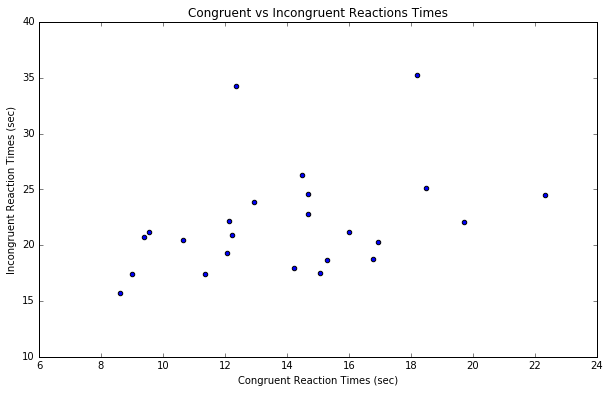

In [26]:
figure = plt.figure(figsize = [10,6])
plt.scatter(x=file["Congruent"],y=file["Incongruent"])
plt.ylabel("Incongruent Reaction Times (sec)")
plt.xlabel("Congruent Reaction Times (sec)")
plt.title("Congruent vs Incongruent Reactions Times")
plt.show()

We observe some linearity in the lower left region of the scatter plot. This indicated region suggest that for persons that properly guess the color congruent words faster, they are able to quickly gues the color of incongruent words.

However, as one has a slower reaction time for guessing the incorrect color of either an incongruent or congruent word, they similarly have a harder time for the congruent or incongruent words, respectively.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We observe that there is a dependency between the Incongruent and Congruent samples because we are testing between two conditions. 

However, it is difficult to proceed with this hypothesis test with two different equally sized sets. So, we take the difference of these sets, and make a new column in our dataframe called **differences**

We make a new column in our dataset, called differences:

In [10]:
file["Differences"] = file["Incongruent"]-file["Congruent"]

In [11]:
#Confirm the first 5 rows of the Difference column
file["Differences"].head()

0     7.199
1     1.950
2    11.650
3     7.057
4     8.134
Name: Differences, dtype: float64

_**Hypothesis Test**_

$H_{0}$: $\bar{x}_{D} = 0$        For the null hypothesis $H_{0}$, We state that for a change in color of the words, there is no difference in reaction time

$H_{A}$: $\bar{x}_{D} \neq 0$    For the Alternative hypothesis $H_{A}$, We state that there is a change in reaction time, from the change in the color of words

_where $\bar{x}_{D}$ is the mean of the differences between congruent and incongruent trials $\bar{x}_{Congruent}-\bar{x}_{Incongruent}$_


We let $\alpha = 0.05$. I.e., We have a 95% confidence level, so let $\alpha$ equal to 5 percent. This $\alpha$ represents if the phenomenon is due to chance.

In [12]:
#What is our sample size n?
print("The sample size 'n' is", file.shape[0],"\nI.e. n=",file.shape[0])

The sample size 'n' is 24 
I.e. n= 24


Now, we solve for the t-statistic

In [13]:
mean(file["Differences"])

7.9647916666666667

In [14]:
stdev(file["Differences"])

4.8648269103590556

In [15]:
#We apply the t_stat function from above to the differences column
t_stat(file["Differences"])

8.020706944109957

We calculated the above t-statistic value from this forumula
$t=\dfrac{\mu_{D}}{\dfrac{s}{\sqrt(n)}}$

Decision Rule:


If t>$t^*$, we reject the null hypothesis $H_{0}$.

Else, we fail to reject the null hypothesis $H_{0}$

We have an n value of $n=24$. We also have our degrees of freedom to be 1. So, our df is $24-1=23$.

With our $\alpha= 5 \%$, we look at the provided t-table, from the beginning of this document, to find our $t^*$. 

Our df is 23, and our p value is $\dfrac{\alpha}{2}=2.5\%$. So, $t^* = 2.069$.

$t(.025,23)=8.02071$ >  greater than $t^*=2.069$.

Therefore, we reject the null hypthesis $H_{0}$

##### Conclusion:

Because we reject the null hypothesis $H_{0}$,
we conclude that there is a differenct between incongruent and congruent trials of the Stroop test.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

#### Testing for affect (Effect Size)

We want to test for the effect size of the differences of the incongruent and congruent trials. 

We will implement both cohen's D and the coefficient of determination to test for effect size

In [16]:
#Cohen's D function for a given column
def coD(column):
    #Mean of the differences / standard deviation 
    cohen_D = mean(column)/stdev(column)
    return(cohen_D)
#Pearson's r for  a given column
def pearsonR(column):
    t= t_stat(column)
    df = column.shape[0]-1
    r_squared = t**2/(t**2+df)
    r= r_squared**(1/2)
    return(r)

In [17]:
#Caclulate Cohen's D
coD(file["Differences"])

1.6372199491222625

There is a 1.63 standard deviation difference from the incongruent sample mean to that of the congruent sample mean

#### Testing for effect (coefficient of determination & pearson's r)

In [18]:
pearsonR(file["Differences"])

0.85827525663070703

We observe a correlation of 85% between the incongruent and congruent cases.

There is a substantial effect from changing of colors and count of word being exposed to participants. I propose the cause of the effects observed is the order of the procedure. This stated order of the two condtions on the participants allows for some type of lurking situation outside our study.

However, there just could be the case that our sample size is small and the participants experience, mental state, etc.

I propose a similar task that would create a similar effect is the length of words given, a wider variation of color options.